# Averaged Artifact Substraction with EEG Data
## First step prepare Jupyter Notebook

In [1]:
import os
from FACET.Facet import Facet
from loguru import logger
import sys

os.getcwd()
os.chdir(os.path.dirname(os.path.abspath("__file__")))

bids_path = "F:\EEG Datasets\openneuro\FMRIWITHMOTION"
export_bids_path = bids_path

# configure logger
logger.remove()
logger.add(sys.stderr, level="DEBUG")
logger.add("Facet.log", level="DEBUG")

window_size = 30
upsampling_factor = 1
artifact_to_trigger_offset_in_seconds = -0.038
relative_window_position = -0.5
moosmann_motion_threshold = 0.8
event_id_description_pairs={'trigger':1}
regex_trigger_annotation_filter = r'\bResponse\b' # Annotations with the description 'trigger' are considered as triggers
unwanted_bad_channels = ['EKG', 'EMG', 'EOG', 'ECG'] # Channels with these names are considered as bad channels and not considered in the processing
evaluation_measures=["SNR", "RMS", "RMS2", "MEDIAN"]

f = Facet()


## Second Step import EEG Data

In [2]:
f.import_EEG(path=bids_path,fmt="bids",upsampling_factor=upsampling_factor,artifact_to_trigger_offset=artifact_to_trigger_offset_in_seconds, bads=['EKG', 'EMG', 'EOG', 'ECG'], subject="xp101", session=None,task="eegfmriNF")
f.plot_EEG(title="after import")


2024-04-06 20:48:07.909 | INFO     | FACET.Facet:import_EEG:18 - Importing EEG from F:\EEG Datasets\openneuro\FMRIWITHMOTION
2024-04-06 20:48:10.688 | DEBUG    | FACET.Frameworks.Analytics:import_EEG:77 - Importing EEG with:
2024-04-06 20:48:10.689 | DEBUG    | FACET.Frameworks.Analytics:import_EEG:78 - Channels ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'POz', 'ECG', 'F1', 'F2', 'C1', 'C2', 'P1', 'P2', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'AF7', 'AF8', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'FT9', 'FT10', 'Fpz', 'CPz']
2024-04-06 20:48:10.690 | DEBUG    | FACET.Frameworks.Analytics:import_EEG:79 - Time Start: 0.0s
2024-04-06 20:48:10.692 | DEBUG    | FACET.Frameworks.Analytics:import_EEG:80 - Time End: 448.8798s
2024-04-06 20:48:10.694 | DEBUG    | FACET.Frameworks.Analytics:impo

## Third Step Preprocessing

In [3]:
f.pre_processing()

2024-04-06 20:48:12.866 | DEBUG    | FACET.Frameworks.Correction:filter:723 - Applying filter with l_freq=1 and h_freq=None
2024-04-06 20:48:19.213 | INFO     | FACET.Frameworks.Correction:upsample:707 - Upsampling Data


## Fourth Step find triggers

In [4]:

f.find_triggers(regex_trigger_annotation_filter) # Using Niazys data
f.find_missing_triggers()
f.align_triggers(0)

2024-04-06 20:48:37.425 | INFO     | FACET.Facet:find_triggers:26 - finding triggers
2024-04-06 20:48:37.429 | DEBUG    | FACET.Frameworks.Analytics:find_triggers:127 - No Stim-Channels found.
2024-04-06 20:48:37.435 | DEBUG    | FACET.Frameworks.Analytics:find_triggers:129 - {'New Segment/': 99999, 'Response/R128': 1128, 'Stimulus/S  2': 2, 'Stimulus/S 99': 99}
2024-04-06 20:48:37.442 | DEBUG    | FACET.Frameworks.Analytics:find_triggers:137 - Found 210 triggers
2024-04-06 20:48:38.346 | INFO     | FACET.Facet:find_triggers:29 - Found 210 triggers
2024-04-06 20:48:38.347 | INFO     | FACET.Frameworks.Analytics:find_missing_triggers:279 - Finding missing triggers using auto mode...
2024-04-06 20:48:38.348 | DEBUG    | FACET.Frameworks.Analytics:find_missing_triggers:282 - Generating template from reference channel...
2024-04-06 20:48:38.923 | WARNING  | FACET.Frameworks.Correction:calc_matrix_AAS:252 - Number of epochs is not equal to the number of triggers. Please check your data. Imc

## Fourth step apply AAS

In [5]:
f.calc_matrix_AAS()

2024-04-06 20:48:52.874 | INFO     | FACET.Facet:calc_matrix_AAS:33 - Applying AAS with method numpy
2024-04-06 20:48:53.516 | WARNING  | FACET.Frameworks.Correction:calc_matrix_AAS:252 - Number of epochs is not equal to the number of triggers. Please check your data. Imcomplete data?
2024-04-06 20:48:53.517 | DEBUG    | FACET.Frameworks.Correction:calc_matrix_AAS:256 - Averaging Channel 0:Fp1
2024-04-06 20:48:53.799 | DEBUG    | FACET.Frameworks.Correction:calc_matrix_AAS:256 - Averaging Channel 1:Fp2
2024-04-06 20:48:54.093 | DEBUG    | FACET.Frameworks.Correction:calc_matrix_AAS:256 - Averaging Channel 2:F3
2024-04-06 20:48:54.380 | DEBUG    | FACET.Frameworks.Correction:calc_matrix_AAS:256 - Averaging Channel 3:F4
2024-04-06 20:48:54.683 | DEBUG    | FACET.Frameworks.Correction:calc_matrix_AAS:256 - Averaging Channel 4:C3
2024-04-06 20:48:54.971 | DEBUG    | FACET.Frameworks.Correction:calc_matrix_AAS:256 - Averaging Channel 5:C4
2024-04-06 20:48:55.262 | DEBUG    | FACET.Framework

## Fifth step Remove Artifacts

2024-04-06 20:49:11.895 | DEBUG    | FACET.Frameworks.Correction:calc_avg_artifact:128 - Calculating Average Artifacts
2024-04-06 20:49:11.901 | DEBUG    | FACET.Frameworks.Correction:calc_avg_artifact:153 - Calculating Artifact for Channel 0:Fp1
2024-04-06 20:49:11.930 | DEBUG    | FACET.Frameworks.Correction:calc_avg_artifact:153 - Calculating Artifact for Channel 1:Fp2
2024-04-06 20:49:11.963 | DEBUG    | FACET.Frameworks.Correction:calc_avg_artifact:153 - Calculating Artifact for Channel 2:F3
2024-04-06 20:49:11.993 | DEBUG    | FACET.Frameworks.Correction:calc_avg_artifact:153 - Calculating Artifact for Channel 3:F4
2024-04-06 20:49:12.020 | DEBUG    | FACET.Frameworks.Correction:calc_avg_artifact:153 - Calculating Artifact for Channel 4:C3
2024-04-06 20:49:12.048 | DEBUG    | FACET.Frameworks.Correction:calc_avg_artifact:153 - Calculating Artifact for Channel 5:C4
2024-04-06 20:49:12.077 | DEBUG    | FACET.Frameworks.Correction:calc_avg_artifact:153 - Calculating Artifact for Cha

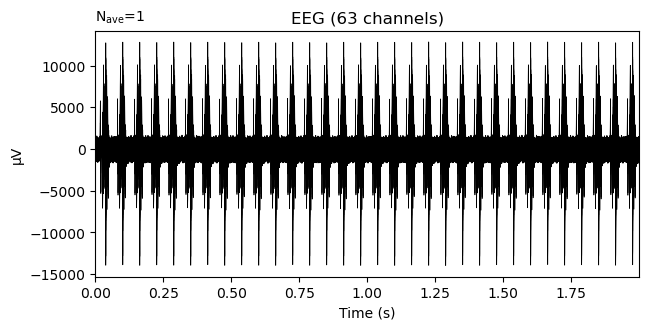

2024-04-06 20:49:14.810 | DEBUG    | FACET.Frameworks.Correction:remove_artifacts:211 - Removing Artifact from Channel 0:Fp1
2024-04-06 20:49:14.820 | DEBUG    | FACET.Frameworks.Correction:remove_artifacts:211 - Removing Artifact from Channel 1:Fp2
2024-04-06 20:49:14.828 | DEBUG    | FACET.Frameworks.Correction:remove_artifacts:211 - Removing Artifact from Channel 2:F3
2024-04-06 20:49:14.836 | DEBUG    | FACET.Frameworks.Correction:remove_artifacts:211 - Removing Artifact from Channel 3:F4
2024-04-06 20:49:14.845 | DEBUG    | FACET.Frameworks.Correction:remove_artifacts:211 - Removing Artifact from Channel 4:C3
2024-04-06 20:49:14.854 | DEBUG    | FACET.Frameworks.Correction:remove_artifacts:211 - Removing Artifact from Channel 5:C4
2024-04-06 20:49:14.864 | DEBUG    | FACET.Frameworks.Correction:remove_artifacts:211 - Removing Artifact from Channel 6:P3
2024-04-06 20:49:14.872 | DEBUG    | FACET.Frameworks.Correction:remove_artifacts:211 - Removing Artifact from Channel 7:P4
2024-0

In [6]:
f.remove_artifacts(plot_artifacts=True)

## Sixth step Post-Processing

In [7]:
f.post_processing()

2024-04-06 20:49:15.397 | INFO     | FACET.Frameworks.Correction:downsample:695 - Downsampling Data
2024-04-06 20:49:53.812 | DEBUG    | FACET.Frameworks.Correction:filter:723 - Applying filter with l_freq=None and h_freq=70


## Seventh display the processed eeg data

In [8]:
f.plot_EEG(title="after lowpass")

## Eighth Evaluate Results and compare with other Methods

2024-04-06 20:50:05.419 | INFO     | FACET.Facet:add_to_evaluate:75 - Adding to evaluation...
2024-04-06 20:50:05.422 | DEBUG    | FACET.Frameworks.Evaluation:add_to_evaluate:31 - Channels that will be evaluated: ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'POz', 'ECG', 'F1', 'F2', 'C1', 'C2', 'P1', 'P2', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'AF7', 'AF8', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'FT9', 'FT10', 'Fpz', 'CPz']
2024-04-06 20:50:07.631 | INFO     | FACET.Facet:import_EEG:18 - Importing EEG from F:\EEG Datasets\openneuro\FMRIWITHMOTION
2024-04-06 20:50:10.330 | DEBUG    | FACET.Frameworks.Analytics:import_EEG:77 - Importing EEG with:
2024-04-06 20:50:10.332 | DEBUG    | FACET.Frameworks.Analytics:import_EEG:78 - Channels ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', '

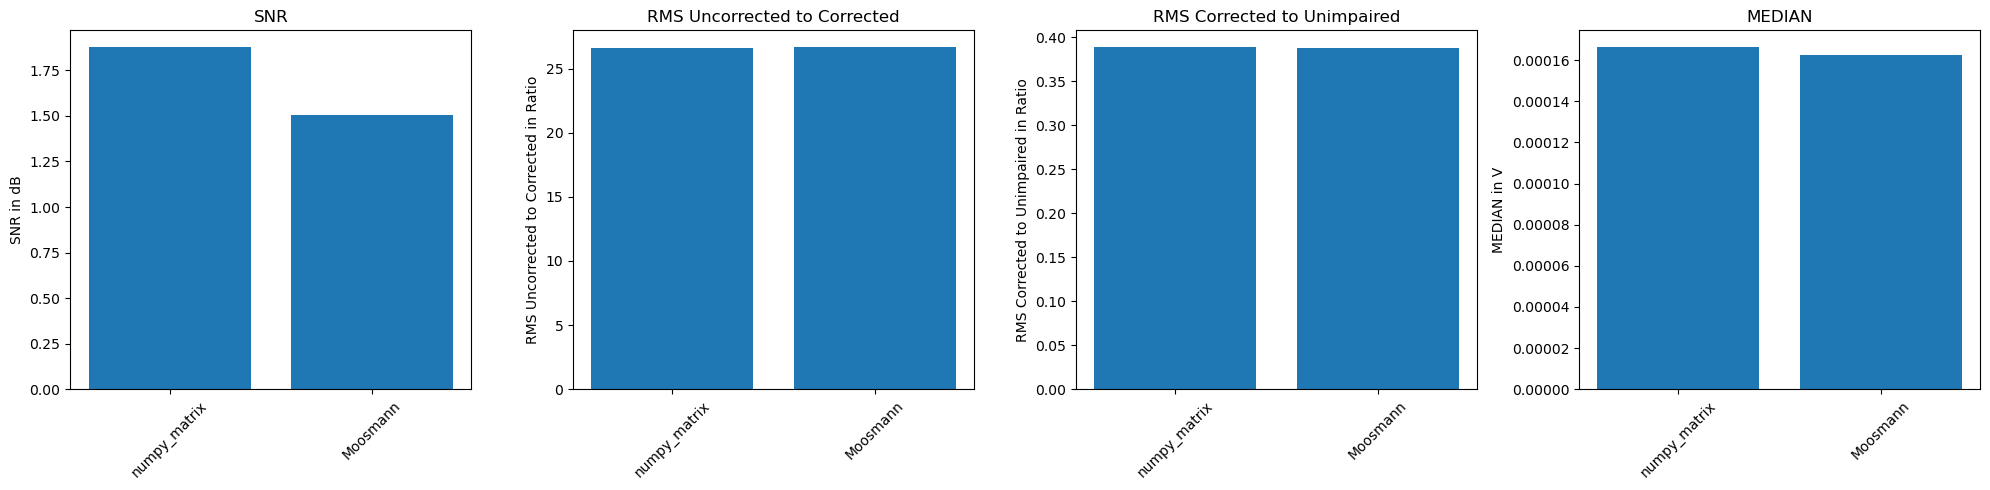

2024-04-06 20:52:49.231 | INFO     | __main__:<module>:16 - [{'Measure': 'SNR', 'Values': [1.876459557277762, 1.5033214613782258], 'Unit': 'dB'}, {'Measure': 'RMS Uncorrected to Corrected', 'Values': [26.610794998122667, 26.65457781415051], 'Unit': 'Ratio'}, {'Measure': 'RMS Corrected to Unimpaired', 'Values': [0.38820427398645396, 0.3877198625365608], 'Unit': 'Ratio'}, {'Measure': 'MEDIAN', 'Values': [0.00016624625424534862, 0.00016242829594554075], 'Unit': 'V'}]


In [9]:
eeg_python = f.get_EEG()
f.add_to_evaluate(eeg_python, name="numpy_matrix") # Matrix will result in >1.0 RMS2 because of python mne inaccuracies

#moosmann
f.import_EEG(path=bids_path,fmt="bids",artifact_to_trigger_offset=artifact_to_trigger_offset_in_seconds,upsampling_factor=upsampling_factor, bads=unwanted_bad_channels, subject="xp101", session=None,task="eegfmriNF")
f.pre_processing()
f.find_triggers(regex_trigger_annotation_filter)
f.find_missing_triggers()
f.align_triggers(0)
f.calc_matrix_motion(file_path="headmotiondata_209s.tsv", threshold=moosmann_motion_threshold)
f.remove_artifacts()
f.post_processing()
f.add_to_evaluate(f.get_EEG(), name="Moosmann")

results = f.evaluate(plot=True,measures=["SNR", "RMS", "RMS2", "MEDIAN"])
logger.info(results)

#f.export_EEG(fmt="bids", event_id=event_id_description_pairs, path=export_bids_path)

